This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fml-sicom3a/master?urlpath=lab/tree/notebooks/7_Clustering/N4_EM_basic.ipynb/)

# EM basic example 
The purpose of this labwork is to implement a Gaussian Mixture Model Clustering algorithm, using Expectation Maximization (EM) method. First, a code is proposed on a 1D example implementing directly the theoretical formula from the lecture. Second, the obtained results are compared with the results obtained using sklearn GMM function. 

## Data import from matlab file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.stats as stats

%matplotlib inline

Data_train = loadmat("fictitious_train.mat")
# Data_train.keys()

X = Data_train.get("Xtrain")
# H=Data_train.get('__header__')
# print("dimensions ox X ={}".format(X.shape))

## initialization of parameters and Kernel computation
- note that here, the number of clusters is set a priori 

In [2]:
# EM
N = X.size
K = 2
p = 1
MaxIter = 100
# init
perm = np.random.permutation(N)[0:2]
pivec = np.ones((K, 1)) / K
muvec = np.zeros((K, p))
sigvec = np.zeros((K, p * p))
postpr = np.zeros((N, K))

for k in range(0, K):
    muvec[k, :] = X[perm[k], :]  # different means
    sigvec[k, :] = np.var(X) * 19 / 20

### Exercise 8 
- Identify the arrays above wrt to the characteristics of the GMM introduced in the lecture
- Explain why different means are initialized, whereas same variances may be used
- Comment the line codes below, briefly

In [3]:
# A posteriori Proba to be in a class

for t in range(0, MaxIter):
    # E-Step
    for i in range(0, N):
        px = 0
        for k in range(0, K):
            px = px + pivec[k] * stats.norm.pdf(
                X[i], muvec[k, :], np.sqrt(sigvec[k, :])
            )

        for k in range(0, K):
            postpr[i, k] = (
                pivec[k] * stats.norm.pdf(X[i], muvec[k, :], np.sqrt(sigvec[k, :])) / px
            )

    # M-step
    for k in range(0, K):
        pivec[k, :] = np.mean(postpr[:, k])
        muvec[k, :] = np.sum(np.reshape(postpr[:, k], (N, p)) * X) / np.sum(
            postpr[:, k]
        )  # a*b = a.*b matlab
        sigvec[k, :] = np.sum(
            np.reshape(postpr[:, k], (N, p)) * (X - muvec[k, :]) ** 2
        ) / np.sum(postpr[:, k])


print("muvec={}".format(muvec))
print("sigvec={}".format(sigvec))
print("pivec={}".format(pivec))
print("postpr={}".format(postpr))

muvec=[[1.08316181]
 [4.65591281]]
sigvec=[[0.81137062]
 [0.81879357]]
pivec=[[0.55459023]
 [0.44540977]]
postpr=[[9.99999461e-01 5.38521833e-07]
 [9.99995050e-01 4.95044601e-06]
 [9.99823688e-01 1.76311678e-04]
 [9.95747409e-01 4.25259057e-03]
 [9.93710854e-01 6.28914640e-03]
 [8.89707868e-01 1.10292132e-01]
 [2.85816487e-02 9.71418351e-01]
 [2.50298339e-03 9.97497017e-01]
 [1.49882100e-04 9.99850118e-01]
 [1.01763339e-05 9.99989824e-01]
 [9.99996187e-01 3.81270397e-06]
 [9.99976260e-01 2.37396020e-05]
 [9.99760741e-01 2.39258867e-04]
 [9.95558293e-01 4.44170743e-03]
 [9.92518202e-01 7.48179846e-03]
 [1.88075235e-01 8.11924765e-01]
 [5.04628243e-03 9.94953718e-01]
 [6.13285415e-04 9.99386715e-01]
 [3.06604930e-05 9.99969340e-01]
 [4.83048832e-07 9.99999517e-01]]


### Exercise 9 
- What is the array that informs about the labels that should be assigned to each observation? Print an example. 
- Below, the plot displays the 2 Gaussian pdfs involved in the mixture; add the mixture distribution to that plot. 

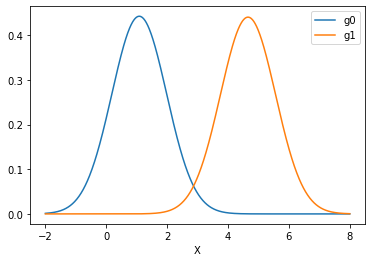

In [4]:
Xt = np.linspace(-2, 8, 1000)
g0 = stats.norm.pdf(Xt, muvec[0], np.sqrt(sigvec[0]))
g1 = stats.norm.pdf(Xt, muvec[1], np.sqrt(sigvec[1]))
g = pivec[0] * g0 + pivec[1] * g1
plt.plot(Xt, g0, label="g0")
plt.plot(Xt, g1, label="g1")
#plt.plot(Xt, g, label="g")
plt.legend()
plt.xlabel("X");

## Sklearn implementation

In [5]:
from sklearn.mixture import GaussianMixture

# Try GMMs using full covariance (no constraints imposed on cov)
est = GaussianMixture(
    n_components=2, covariance_type="full", max_iter=MaxIter, random_state=0
)

est.fit(X)

print("est.cov={}".format(est.covariances_.squeeze()))
print("est.means={}".format(est.means_.squeeze()))
print("est.weights={}".format(est.weights_))

est.cov=[0.80453749 0.82470987]
est.means=[1.07911119 4.65159155]
est.weights=[0.55342265 0.44657735]


### Exercise 10
- compare the results obtained with sklearn with the previously obtained results. 
- Comments? 
- Add the mixture pdf to the plot

Text(0.5, 0, 'X')

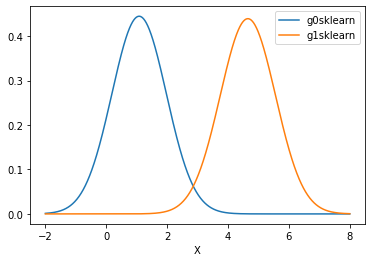

In [6]:
Xt = np.linspace(-2, 8, 1000)
g0sklearn = stats.norm.pdf(
    Xt, np.squeeze(est.means_[0]), np.sqrt(np.squeeze(est.covariances_[0]))
)

g1sklearn = stats.norm.pdf(
    Xt, np.squeeze(est.means_[1]), np.sqrt(np.squeeze(est.covariances_[1]))
)

#gsklearn = est.weights_[0] * g0sklearn + est.weights_[1] * g1sklearn

plt.plot(Xt, g0sklearn, label="g0sklearn")
plt.plot(Xt, g1sklearn, label="g1sklearn")
#plt.plot(Xt, gsklearn, label="gsklearn")
plt.legend()
plt.xlabel("X")

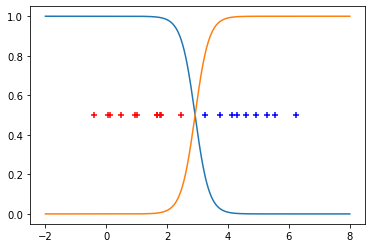

In [7]:
# Kmeans vs EM
resp0 = pivec[0] * g0 / g
resp1 = pivec[1] * g1 / g

plt.plot(Xt, resp0, label="responsability class0")
plt.plot(Xt, resp1, label="responsability class1")

Y = est.fit_predict(X)
plt.scatter(
    X[Y == 0], np.ones_like(X[Y == 0]) * 0.5, color="red", marker="+", label="class 0"
)
plt.scatter(
    X[Y == 1], np.ones_like(X[Y == 1]) * 0.5, color="blue", marker="+", label="class 1"
)
# plt.legend();

### Exercise 11
- Compare and interpret Kmeans wrt EM; 
- Interpret the responsibility functions resp0 and resp1. 
- Why is EM sometimes interpreted as a "soft-Kmeans" algorithm? What would be the responsibility curves for Kmeans? 